## AIRLINE CUSTOMER SATISFACTION: PROBLEM STATEMENT 1

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [5]:
df=pd.read_csv('Airline_satisfaction.csv')

##### PERCENTAGE OF AIRLINE PASSENGERS WHO ARE SATISFIED

Text(0.5, 1.0, 'Percentage of Satisfied Customer')

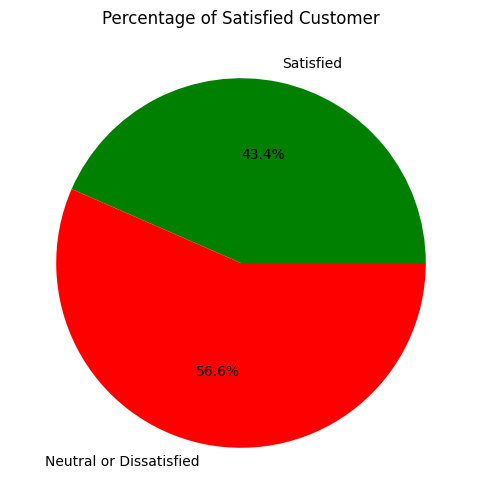

In [8]:
satisfied=(df['Satisfaction']=='Satisfied').sum()
dissatisfied=(df['Satisfaction']=='Neutral or Dissatisfied').sum()
totalcustomer=satisfied+dissatisfied
satisfied_per=(satisfied/totalcustomer)*100
dissatisfied_per=(dissatisfied/totalcustomer)*100

plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
plt.pie([satisfied_per, dissatisfied_per], labels=['Satisfied', 'Neutral or Dissatisfied'], autopct='%1.1f%%', colors=['green', 'red'])
plt.title('Percentage of Satisfied Customer')


##### VARIATION OF SATISFACTION LEVEL WITH CUSTOMER TYPE

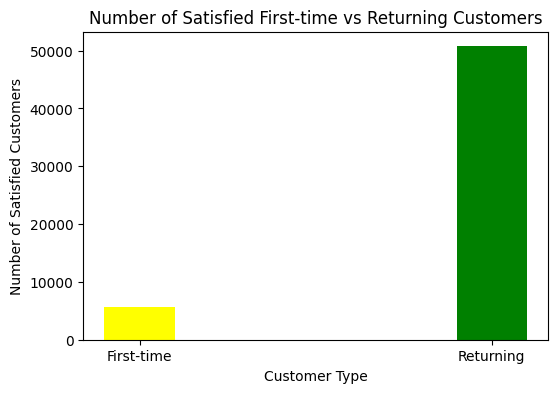

In [17]:
satisfied_firsttime = df[(df['Customer Type'] == 'First-time') & (df['Satisfaction'] == 'Satisfied')].shape[0]
satisfied_returning = df[(df['Customer Type'] == 'Returning') & (df['Satisfaction'] == 'Satisfied')].shape[0]
categories = ['First-time', 'Returning']
values = [satisfied_firsttime, satisfied_returning]
plt.figure(figsize=(6, 4))
plt.bar(categories, values, color=['yellow', 'green'],width=0.2)
plt.title('Number of Satisfied First-time vs Returning Customers')
plt.xlabel('Customer Type')
plt.ylabel('Number of Satisfied Customers')
plt.show()


##### VARIATION OF SATISFACTION LEVEL WITH DIFFERENT TYPES OF TRAVEL

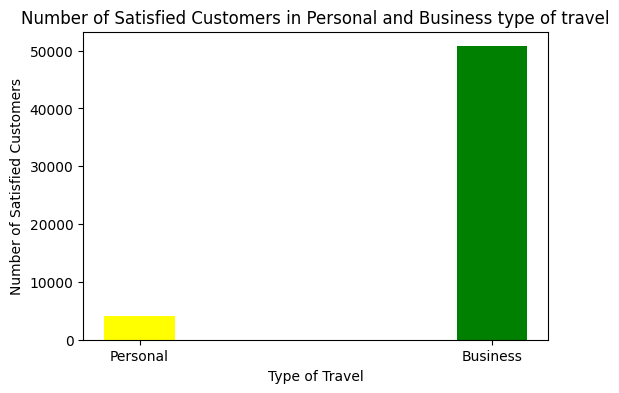

In [18]:
satisfied_personal = df[(df['Type of Travel'] == 'Personal') & (df['Satisfaction'] == 'Satisfied')].shape[0]
satisfied_buisness = df[(df['Customer Type'] == 'Returning') & (df['Satisfaction'] == 'Satisfied')].shape[0]

category=['Personal','Business']
value=[satisfied_personal,satisfied_buisness]
plt.figure(figsize=(6,4))
plt.bar(category, value, color=['yellow', 'green'],width=0.2)
plt.title('Number of Satisfied Customers in Personal and Business type of travel')
plt.xlabel('Type of Travel')
plt.ylabel('Number of Satisfied Customers')
plt.show()

#### FIRST TIME VERSUS RETURNING CUSTOMER ANALYSIS


Text(0.5, 1.0, 'Percentage of First-time vs Returning Customers')

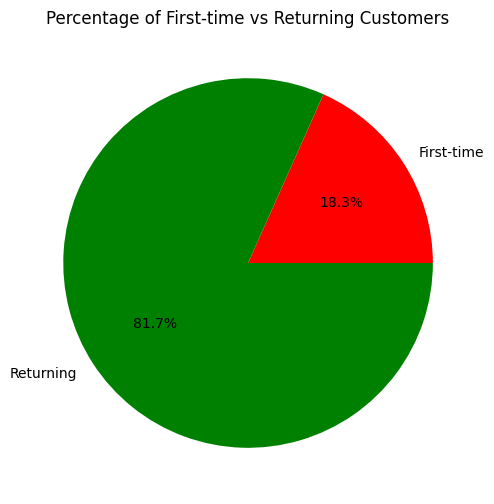

In [20]:
first_time=(df['Customer Type']=='First-time').sum()
returning_type=(df['Customer Type']=='Returning').sum()
total_customer=first_time+returning_type
first_time_per=(first_time/total_customer)*100
return_type_per=(returning_type/total_customer)*100

plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
plt.pie([first_time_per, return_type_per], labels=['First-time', 'Returning'], autopct='%1.1f%%', colors=['red', 'green'])
plt.title('Percentage of First-time vs Returning Customers')


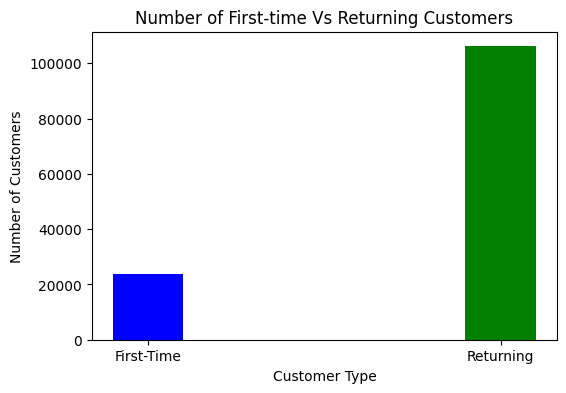

In [21]:
cat=['First-Time','Returning']
val=[first_time,returning_type]
plt.figure(figsize=(6, 4))
plt.bar(cat, val, color=['blue', 'green'],width=0.2)
plt.title('Number of First-time Vs Returning Customers')
plt.xlabel('Customer Type')
plt.ylabel('Number of Customers')
plt.show()


##### Average age of Male passengers as well as Female Passengers travelling for the First-Time

In [30]:
male_df=df[(df['Gender']=='Male') & (df['Customer Type']=='First-time')]
sum_male=male_df['Age'].sum()
num_male=male_df.shape[0]
avrg_male_age=sum_male/num_male

np.float64(30.249337112553718)

In [31]:
female_df=df[(df['Gender']=='Female') & (df['Customer Type']=='First-time')]
sum_female=female_df['Age'].sum()
num_female=female_df.shape[0]
avrg_female_age=sum_female/num_female

np.float64(30.44047340963949)

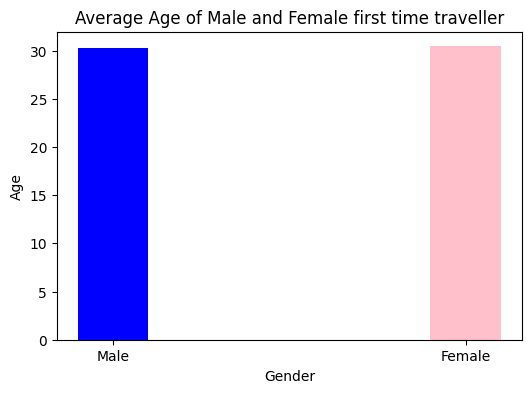

In [33]:
catt=['Male','Female']
vall=[avrg_male_age,avrg_female_age]
plt.figure(figsize=(6, 4))
plt.bar(catt, vall, color=['blue', 'pink'],width=0.2)
plt.title('Average Age of Male and Female first time traveller')
plt.xlabel('Gender')
plt.ylabel('Age')
plt.show()

##### PERCENTAGE OF PASSENGERS WHO FACED DEPARTURE DELAY BUT NO ARRIVAL DELAY

In [10]:
new_df=df[(df['Departure Delay']!=0) & (df['Arrival Delay']==0)]
num=new_df.shape[0]
total=df.shape[0]-num

Text(0.5, 1.0, 'Percentage of passengers who faced Departure Delay but no Arrival Delay')

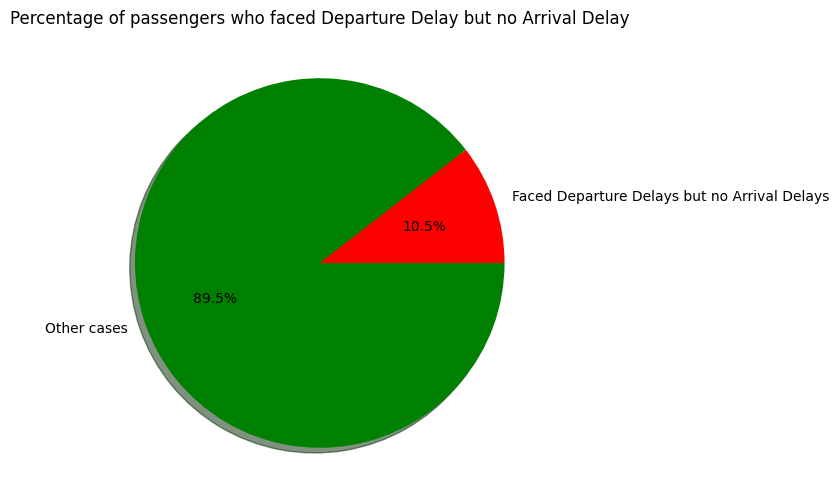

In [16]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
plt.pie([num,total], labels=['Faced Departure Delays but no Arrival Delays', 'Other cases'], autopct='%1.1f%%', colors=['red', 'green'],shadow=True, startangle=0)
plt.title('Percentage of passengers who faced Departure Delay but no Arrival Delay')

##### BUSINESS CLASS VS ECONOMY CLASS : COMPARISON

In [20]:
business_total=(df['Class']=='Business').sum()
economy_total=(df['Class']=='Economy').sum()
economy_plus_total=(df['Class']=='Economy Plus').sum()

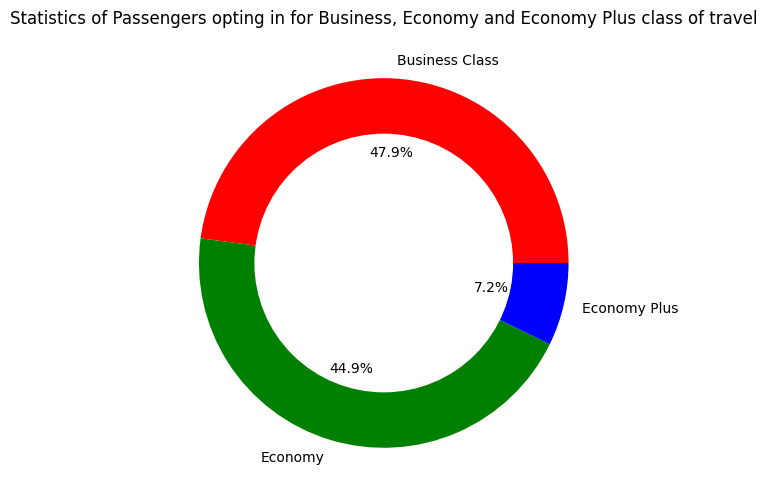

In [23]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
plt.pie([business_total,economy_total,economy_plus_total], labels=['Business Class', 'Economy','Economy Plus'], autopct='%1.1f%%', colors=['red', 'green', 'blue'], startangle=0)
plt.title('Statistics of Passengers opting in for Business, Economy and Economy Plus class of travel')
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

##### FACTORS CONTRIBUTING TO CUSTOMER SATISFACTION THE MOST


In [24]:
# In order to find correlation between two categories containing continuous variable, 
# we can use the PEARSON method. 
# However, when it comes to establishing a relation between a continous variable
# and a category we need to import scikit in order to do it.


In [25]:
# Using the hint given in Problem Statement: 

from sklearn.preprocessing import LabelEncoder
label_encoders={}
for column in df.select_dtypes(include=['object']).columns:
    le=LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

correlation_matrix=df.corr()
correlation_matrix


#Label Encoder basically assigns "Not Satisfied" a value of 0 and "Satisfied" a value of 1
#This happens because "Not Satisfied" appears before "Satisfied".

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
ID,1.000000,-0.001361,0.020322,-0.001467,-0.000935,-0.104671,0.095504,-0.017643,-0.035405,-0.002192,...,0.055502,0.052164,0.044088,0.024048,-0.000510,0.078793,-0.023096,0.001620,0.074569,0.013182
Gender,-0.001361,1.000000,0.008996,0.030958,0.009503,-0.011574,0.003616,0.003491,0.001286,0.008995,...,0.006447,-0.030756,0.031047,0.002867,0.001730,0.038504,0.005901,0.003843,0.036356,0.011236
Age,0.020322,0.008996,1.000000,0.284172,-0.044808,-0.116921,0.099459,-0.009041,-0.011206,0.036960,...,0.057078,0.159136,0.039119,0.052565,0.023194,-0.051347,0.016116,0.074947,-0.047991,0.134091
Customer Type,-0.001467,0.030958,0.284172,1.000000,0.308236,-0.042994,0.226021,-0.003859,-0.004769,0.206873,...,0.054172,0.156239,0.046841,0.081302,0.056997,-0.023292,0.005757,0.106001,-0.024874,0.186017
Type of Travel,-0.000935,0.009503,-0.044808,0.308236,1.000000,0.486718,-0.266792,-0.005913,-0.005972,0.257102,...,-0.059794,-0.127717,-0.139612,-0.084615,-0.068986,-0.023538,-0.105865,-0.152936,-0.033012,-0.449861
Class,-0.104671,-0.011574,-0.116921,-0.042994,0.486718,1.000000,-0.426925,0.009530,0.014037,0.087152,...,-0.210649,-0.212334,-0.198825,-0.129623,-0.080773,-0.159285,-0.024962,-0.183162,-0.166588,-0.448193
Flight Distance,0.095504,0.003616,0.099459,0.226021,-0.266792,-0.426925,1.000000,0.002402,-0.001973,-0.018914,...,0.111194,0.157662,0.134533,0.095648,0.057066,0.059316,0.006701,0.130507,0.064855,0.298085
Departure Delay,-0.017643,0.003491,-0.009041,-0.003859,-0.005913,0.009530,0.002402,1.000000,0.959382,0.000778,...,-0.030486,-0.027999,0.014574,-0.014543,-0.029164,-0.054432,-0.015946,-0.027012,-0.004105,-0.050740
Arrival Delay,-0.035405,0.001286,-0.011206,-0.004769,-0.005972,0.014037,-0.001973,0.959382,1.000000,-0.001005,...,-0.034671,-0.030397,0.011384,-0.016547,-0.031685,-0.059685,-0.017762,-0.030183,-0.007997,-0.058145
Departure and Arrival Time Convenience,-0.002192,0.008995,0.036960,0.206873,0.257102,0.087152,-0.018914,0.000778,-0.001005,1.000000,...,0.067297,0.008666,0.010617,0.009862,0.000687,0.072195,0.344915,-0.008380,0.070833,-0.054270


###### In this above dataframe, a ratio of:
###### +1 indicates that there's a proportional increase in  variable with the increase in other variable.
###### -1 indicates that there's a proportional decrease in variable with the increase in other variable
###### (0.5-0.9)- represents a good correlation, however it does not gurantee that there exists a relationship between the two variables
###### A value close to 0 indicates a bad correlation which means that there exists no relationship between the two variables